In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [5]:
X.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_transform = ss.transform(X)

In [7]:
type(X_transform)

numpy.ndarray

In [8]:
pd.DataFrame(X_transform,columns = X.columns).describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-2.331468e-16,-1.193490e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [9]:
set(y)

{0, 1}

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,random_state=2,test_size=0.2)

In [11]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred = log.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [13]:
y_test[:5]

94     0
32     0
225    0
157    0
356    1
Name: Purchased, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [15]:
y_proba = log.predict_proba(X_test)
y_proba[:5]

array([[0.93116359, 0.06883641],
       [0.99868527, 0.00131473],
       [0.87273621, 0.12726379],
       [0.94689362, 0.05310638],
       [0.09062931, 0.90937069]])

In [16]:
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [17]:
# Decision Tree
# Randomforest
# Other ML models on classification

# Decision Tree

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [19]:
X = cancer.data
y = cancer.target

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

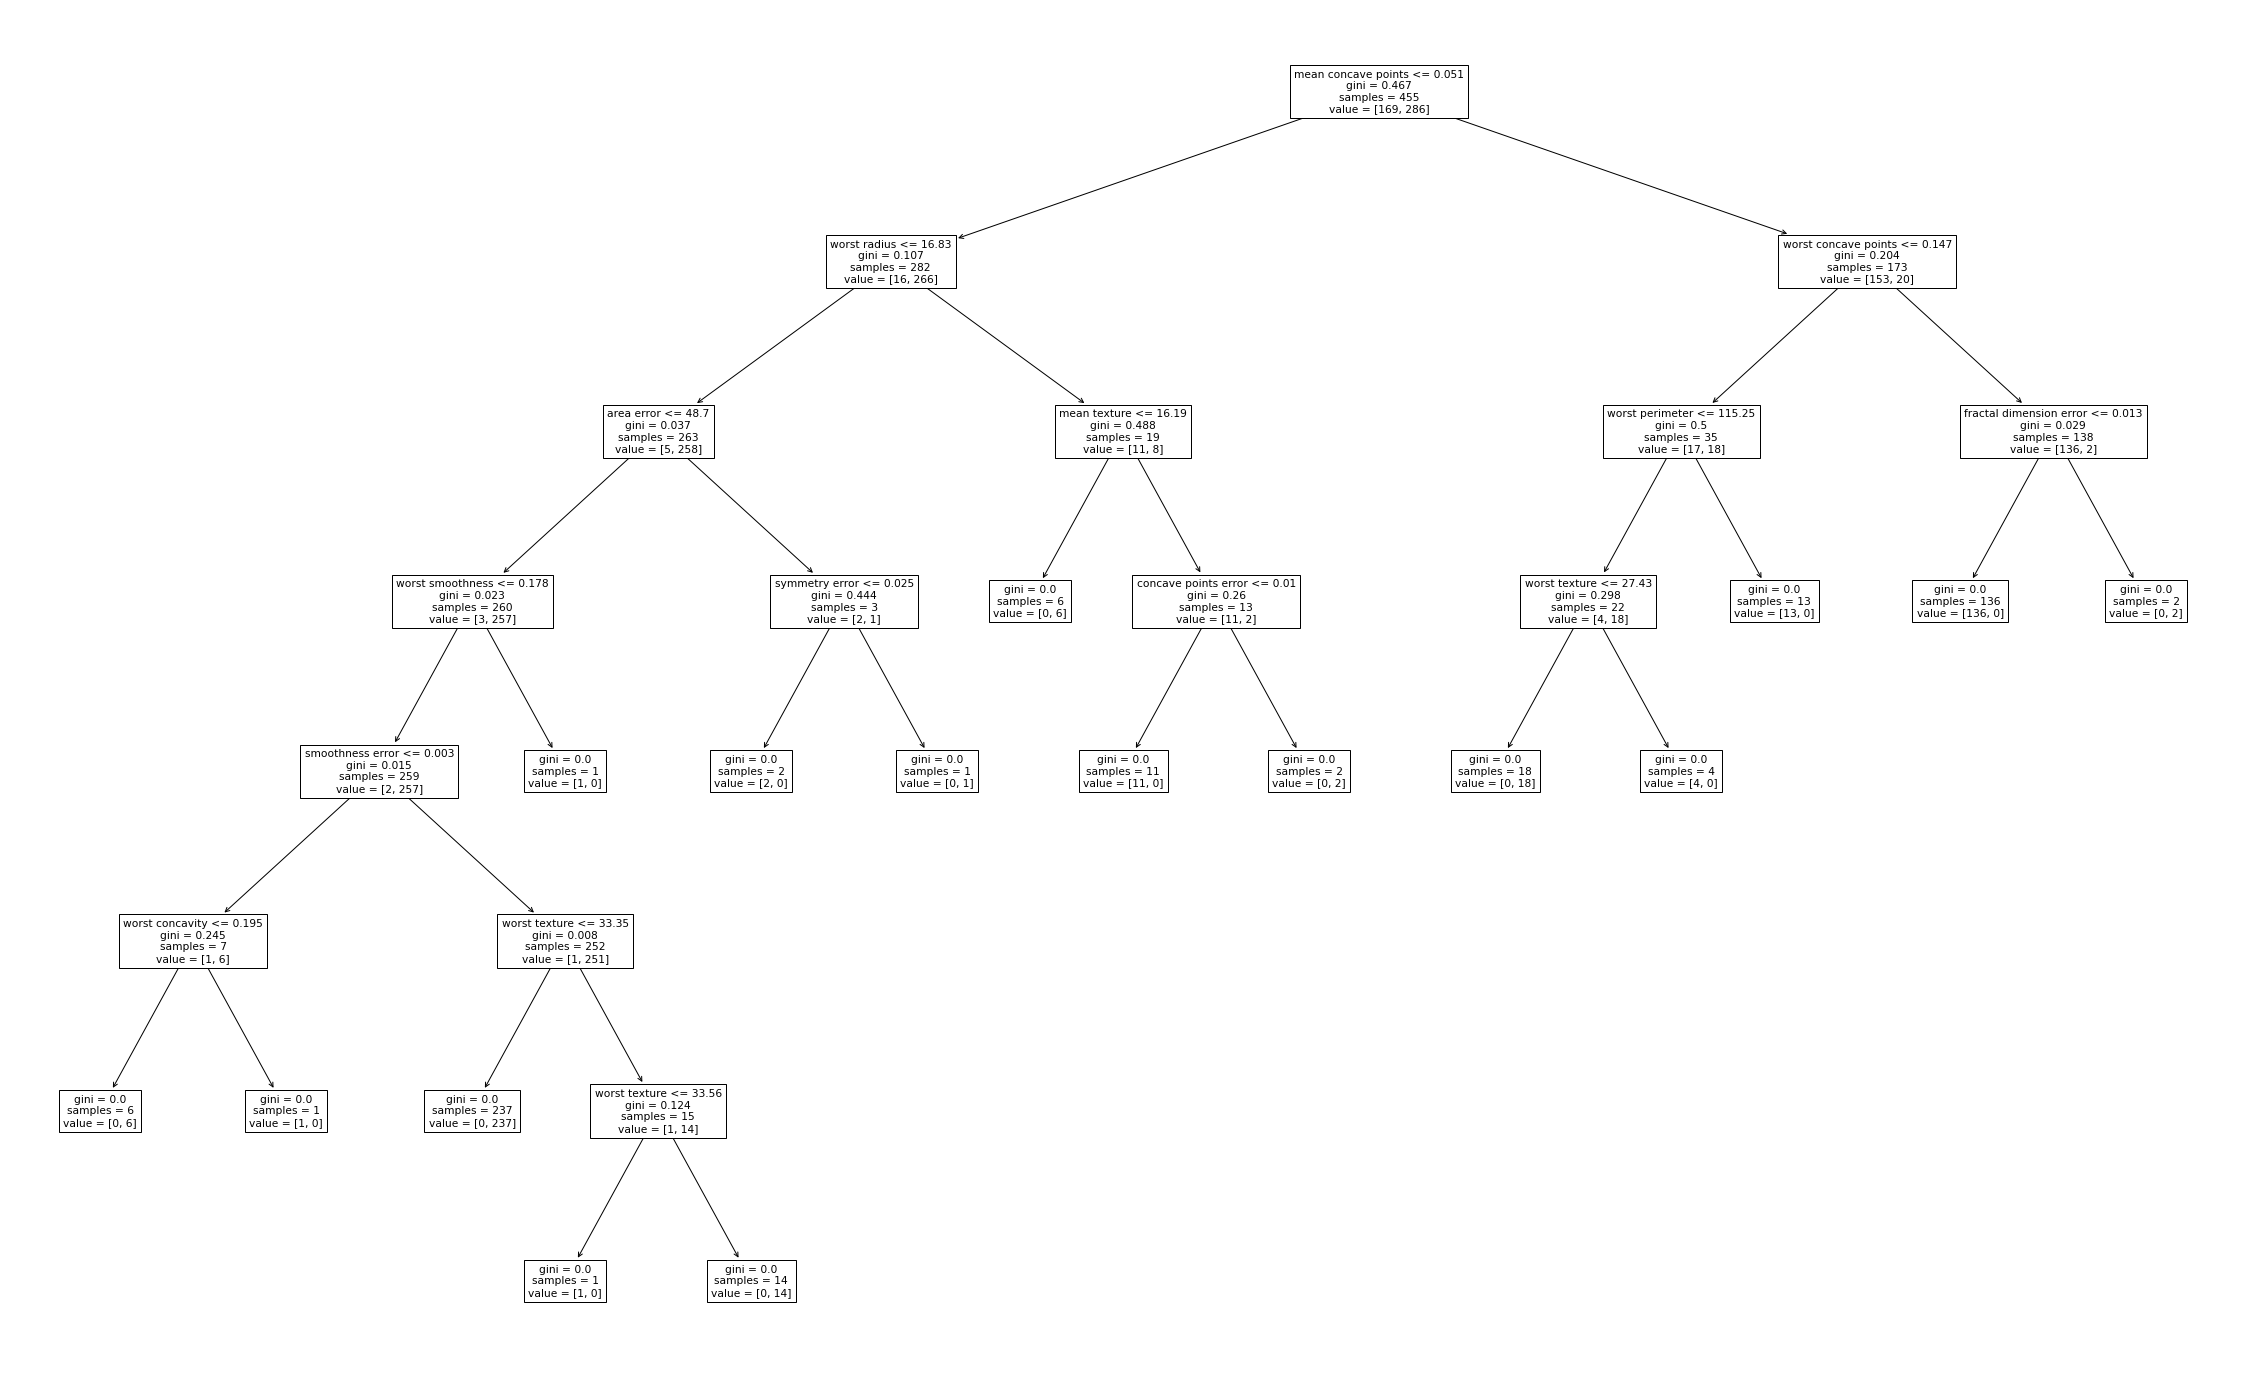

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40,25))
plot_tree(tree, feature_names = cancer.feature_names)
plt.show()

In [23]:
tree.get_depth()

7

In [24]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred) # Accuracy Evaluation of Decision Tree

0.9385964912280702

In [25]:
y_pred[:5]

array([1, 0, 0, 1, 1])

In [26]:
y_test[:5]

array([1, 0, 0, 1, 1])

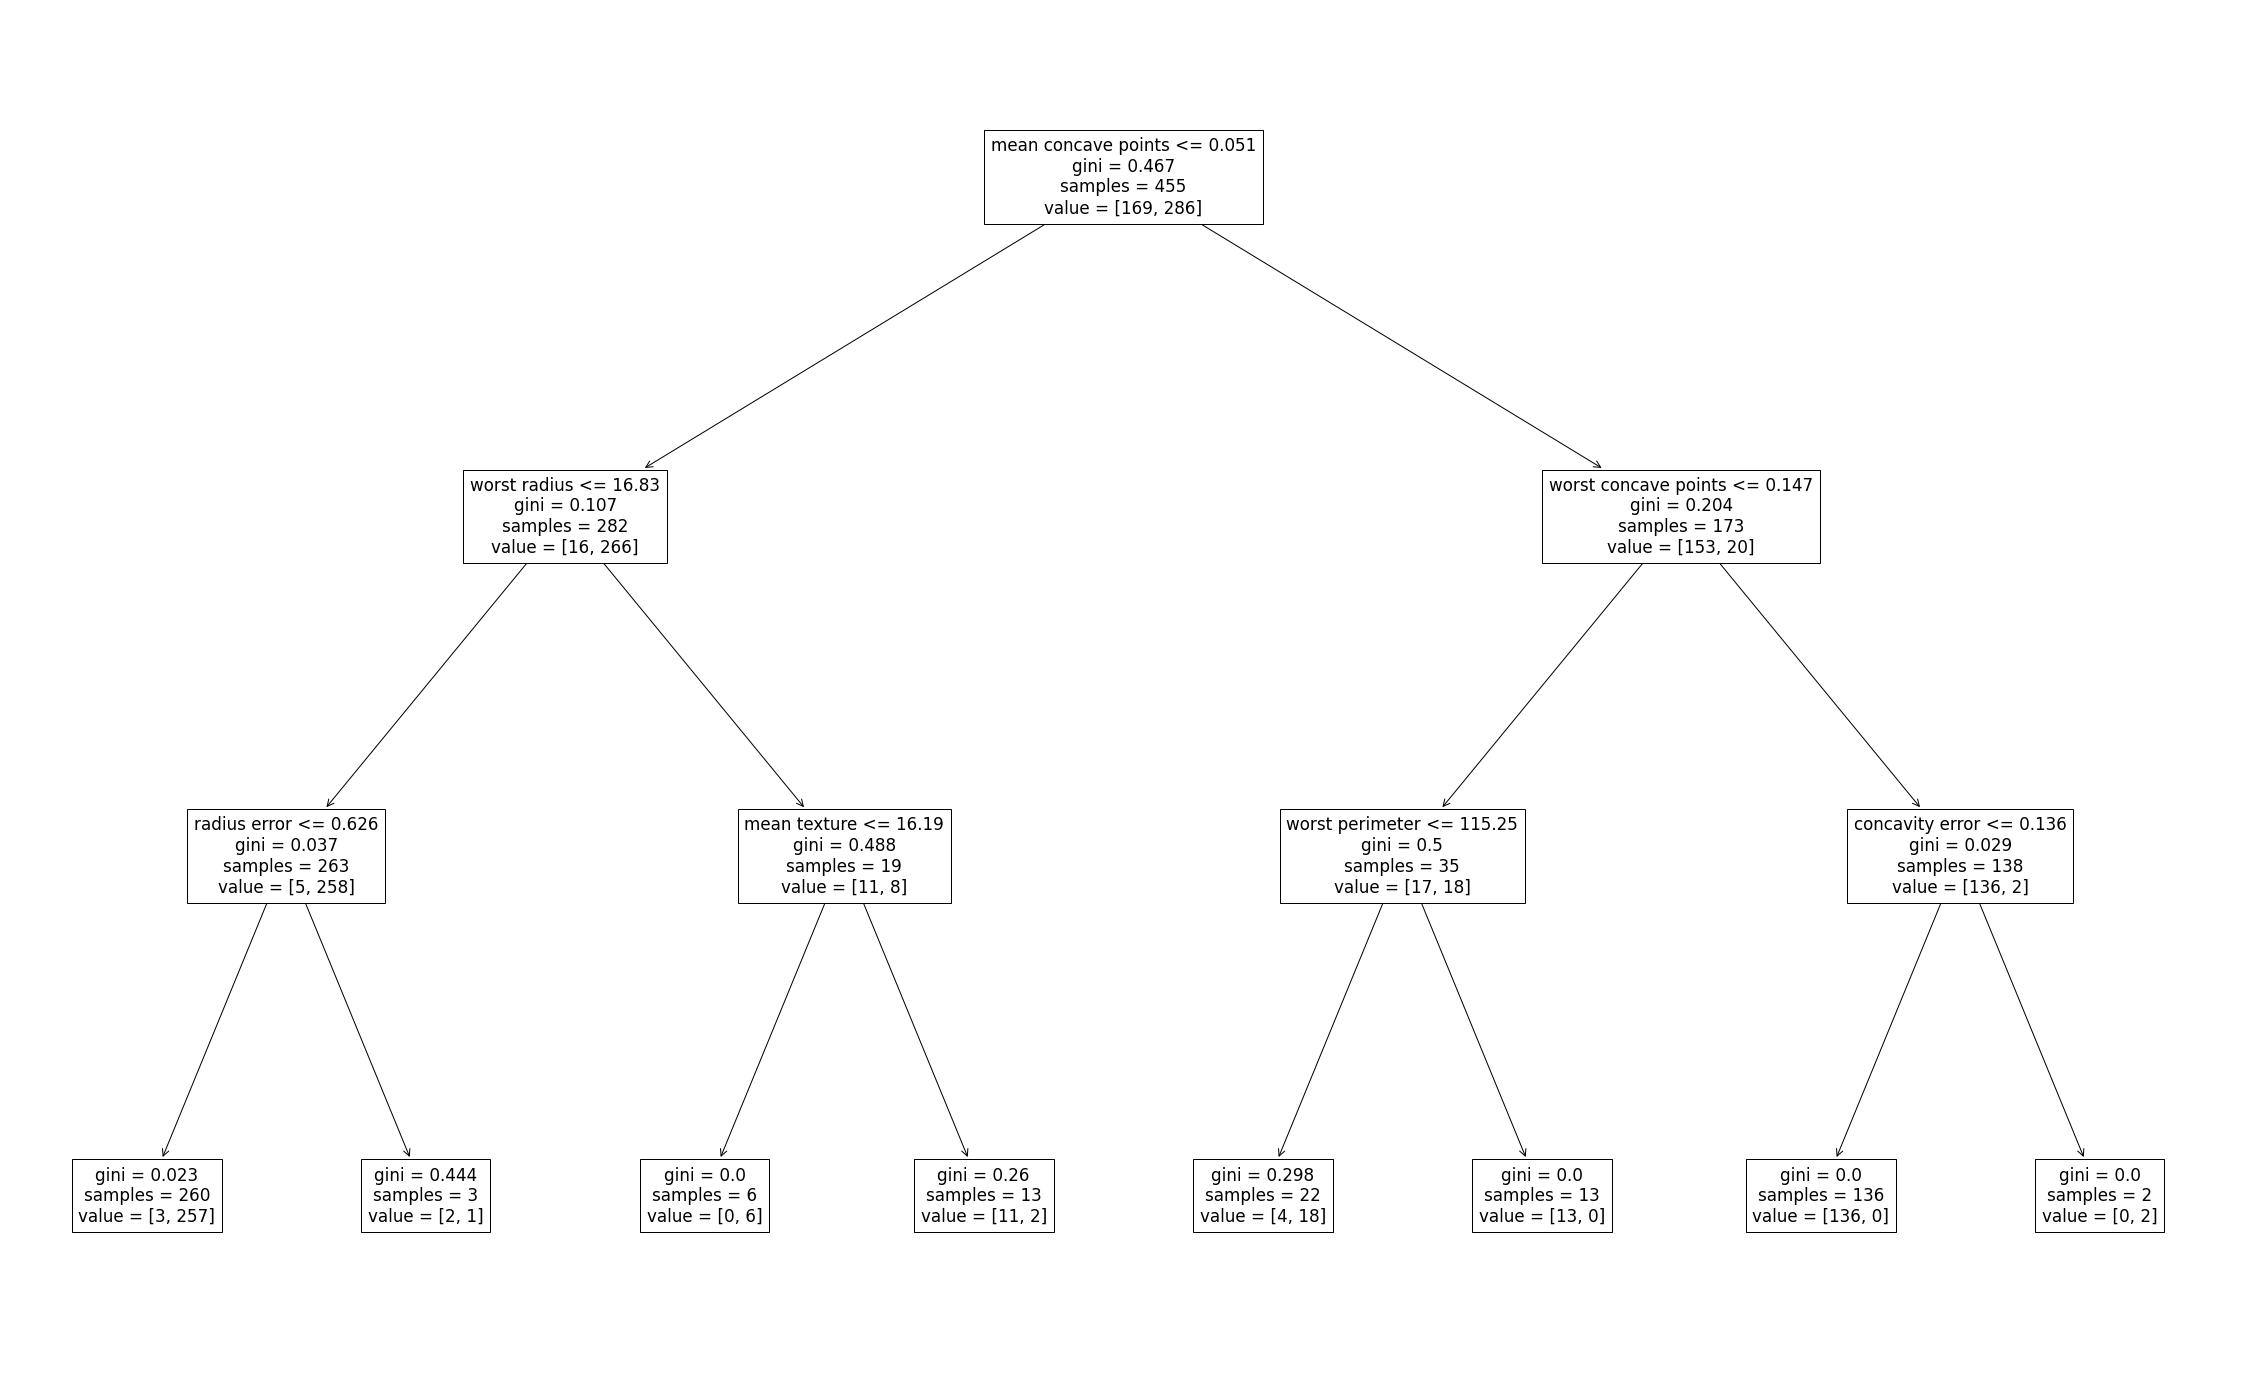

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

plt.figure(figsize=(40,25))
plot_tree(tree, feature_names = cancer.feature_names)
plt.show()

In [28]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred) # Accuracy Evaluation of Decision Tree

0.9385964912280702

# Grid Search CV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {'criterion':["gini", "entropy", "log_loss"],
          "max_depth": range(2,15),
          "splitter": ["best", "random"]
          }

In [31]:
dt = DecisionTreeClassifier()

In [32]:
grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    scoring='accuracy')

In [33]:
grid.fit(X_train,y_train)

C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 390.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [35]:
grid.best_score_

0.9406593406593406

In [36]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'splitter': 'random'}

In [37]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13, splitter='random')

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
randomcv = RandomizedSearchCV(estimator=dt,
                              param_distributions=params,
                              n_iter=20)

In [40]:
randomcv.fit(X_train,y_train)
randomcv.best_score_

C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

0.9428571428571428

In [41]:
randomcv.best_params_

{'splitter': 'random', 'max_depth': 14, 'criterion': 'entropy'}

In [42]:
# How to select the feature for splitting
# How do specify the depth of the decision tree - GridSearch CV
# Why should I specify the depth of decision tree -  GridSearch CV
# Selecting the parameters of Decision Tree - Hyper paramter tuning

In [43]:
# Random Forest
# k-fold cross validation technique
# Naive Bayes Algorithm
# SVM
# KNN
# Metrics to measure performace of Classification models

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [45]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [47]:
rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [48]:
#feature importances
rf.feature_importances_

array([0.03449095, 0.01643655, 0.05592178, 0.03011535, 0.00624402,
       0.01233779, 0.05137878, 0.13189836, 0.00463877, 0.00436015,
       0.01229297, 0.00509731, 0.01455221, 0.04594365, 0.00460665,
       0.00541961, 0.00593795, 0.00451378, 0.00416154, 0.00542872,
       0.09608484, 0.0213208 , 0.12030754, 0.1019796 , 0.01126406,
       0.01201052, 0.03400795, 0.12567573, 0.01490589, 0.00666615])

In [49]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [50]:
df = pd.DataFrame()
df['Columns']  =cancer.feature_names
df['importance'] = rf.feature_importances_
df

,Columns,importance
0,mean radius,0.034491
1,mean texture,0.016437
2,mean perimeter,0.055922
3,mean area,0.030115
4,mean smoothness,0.006244
5,mean compactness,0.012338
6,mean concavity,0.051379
7,mean concave points,0.131898
8,mean symmetry,0.004639
9,mean fractal dimension,0.004360


In [51]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
df = pd.DataFrame()
df['Columns']  =cancer.feature_names
df['importance'] = rf.feature_importances_

df.sort_values('importance',ascending=False)

,Columns,importance
7,mean concave points,0.131898
27,worst concave points,0.125676
22,worst perimeter,0.120308
23,worst area,0.101980
20,worst radius,0.096085
2,mean perimeter,0.055922
6,mean concavity,0.051379
13,area error,0.045944
0,mean radius,0.034491
26,worst concavity,0.034008


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [56]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transform = ss.fit_transform(X_train)

In [58]:
X_test_transform = ss.transform(X_test)

In [59]:
knn.fit(X_train_transform,y_train)

y_pred = knn.predict(X_test_transform)
accuracy_score(y_test,y_pred)

0.9473684210526315

In [60]:
#  How to find best value of k

for neighbors in range(2,11):
  knn = KNeighborsClassifier(n_neighbors=neighbors)
  knn.fit(X_train_transform,y_train)

  y_pred = knn.predict(X_test_transform)
  
  print("Accuracy score is",accuracy_score(y_test,y_pred),"for the value of k:",neighbors)

Accuracy score is 0.9385964912280702 for the value of k: 2
Accuracy score is 0.9473684210526315 for the value of k: 3
Accuracy score is 0.956140350877193 for the value of k: 4
Accuracy score is 0.9473684210526315 for the value of k: 5
Accuracy score is 0.956140350877193 for the value of k: 6
Accuracy score is 0.9473684210526315 for the value of k: 7
Accuracy score is 0.956140350877193 for the value of k: 8
Accuracy score is 0.9649122807017544 for the value of k: 9
Accuracy score is 0.956140350877193 for the value of k: 10


In [61]:
from sklearn.svm import SVC
svc = SVC()

In [62]:
#Preferred that we scale the dataset
svc.fit(X_train_transform,y_train)

y_pred = svc.predict(X_test_transform)

accuracy_score(y_test,y_pred)

0.9824561403508771

In [63]:
#Hyperparameters tuning - C , kernel

# Naive Bayes Algorithm

In [64]:
X_train_transform

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [66]:
nb.fit(X_train_transform,y_train)

GaussianNB()

In [67]:
y_pred = nb.predict(X_test_transform)
accuracy_score(y_test,y_pred)

0.9649122807017544